In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

from utils.base_set import X_train, y_train, seed

### SVM

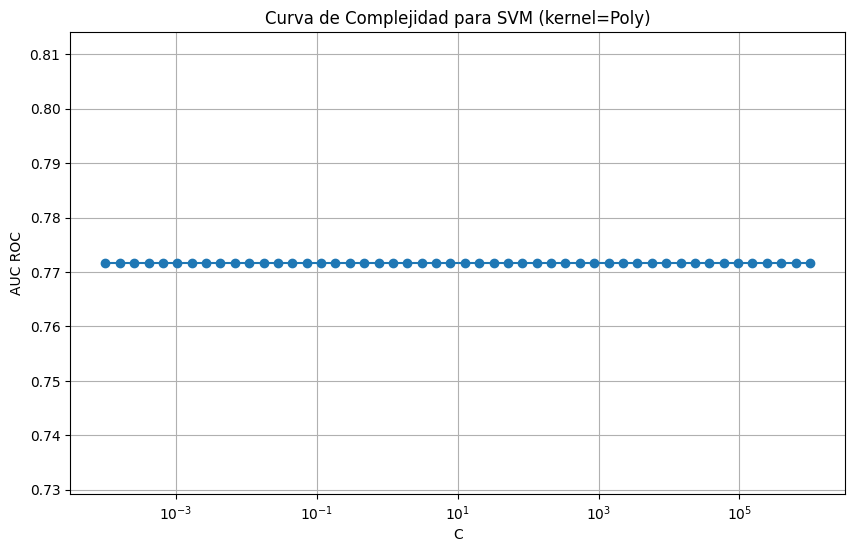

In [2]:
C_values = np.logspace(-4, 6, 50)

mean_auc_scores = []
std_auc_scores = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for C in C_values:
    svm = SVC(C=C, kernel='poly', gamma= 0.04165205264420924, probability=True, random_state=seed)
    
    auc_scores = cross_val_score(svm, X_train, y_train, cv=cv, scoring='roc_auc')
    
    mean_auc_scores.append(np.mean(auc_scores))
    std_auc_scores.append(np.std(auc_scores))

plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_auc_scores, '-o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('AUC ROC')
plt.title('Curva de Complejidad para SVM (kernel=Poly)')
plt.grid(True)
plt.show()